<a href="https://colab.research.google.com/github/HazemmoAlsady/AWN_Graduation_Project/blob/main/AWN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re
import os

In [290]:
df = pd.read_excel("/content/awn_dataset.xlsx")

In [291]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,age,expense_to_income_ratio,recommended_org,gender
0,نجلاء عبدالباسط,5.037050e+13,ذوي إعاقة,3.0,1.183630e+09,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1.0,49.0,1.70,جمعية الأورمان,female
1,حسن كمال,6.515039e+13,أيتام,4.0,1.014614e+09,1000.0,3497.0,6328.0,8961.0,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0.0,37.0,1.81,جمعية التكافل الاجتماعي,male
2,فاطمة عبدالرحمن,3.251524e+13,أرملة,8.0,1.013125e+09,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3.0,22.0,1.55,جمعية رسالة,female
3,إبراهيم الهواري,4.607155e+13,أيتام,6.0,1.200902e+09,600.0,2873.0,5516.0,0.0,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1.0,47.0,1.92,NaN,NaN
4,NaN,6.335249e+13,أسرة فقيرة,7.0,1.529047e+09,1500.0,3101.0,6208.0,10983.0,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3.0,64.0,2.00,جمعية الأورمان,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,2.959917e+10,أيتام,3.0,1.129841e+09,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,علي عبدالرحمن من أيتام مقيم في مدينة نصر ويحتا...,financial,Medium,أسوان,السيدة زينب,3.0,22.0,1.54,جمعية التكافل الاجتماعي,male
59996,خالد عبدالباقي,9.592012e+13,أيتام,7.0,1.226111e+09,500.0,1457.0,3116.0,0.0,إيجار,...,خالد عبدالباقي من أيتام مقيم في فيصل ويحتاج: ت...,food,Medium,بني سويف,سان ستيفانو,4.0,46.0,NaN,NaN,male
59997,صفاء شريف,2.894880e+13,ذوي إعاقة,3.0,1.066819e+09,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,صفاء شريف من ذوي إعاقة مقيم في إمبابة ويحتاج: ...,disability_equipment,Medium,قنا,مدينة نصر,NaN,28.0,2.03,مؤسسة مصر الخير,female
59998,إبراهيم عبدالفتاح,9.227969e+13,NaN,7.0,1.122038e+09,800.0,1501.0,1962.0,0.0,إيجار,...,إبراهيم عبدالفتاح من أرملة مقيم في السيدة زينب...,food,Low,أسوان,شبرا,2.0,NaN,1.31,جمعية رسالة,female


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     57035 non-null  object 
 1   national_id              57050 non-null  float64
 2   case_type                56933 non-null  object 
 3   family_size              57021 non-null  float64
 4   phone                    57124 non-null  float64
 5   amount_received          57009 non-null  float64
 6   income_monthly           57073 non-null  float64
 7   monthly_expenses         57060 non-null  float64
 8   debts                    57014 non-null  float64
 9   housing_type             56982 non-null  object 
 10  health_status            57116 non-null  object 
 11  request_text             56989 non-null  object 
 12  assistance_type          56988 non-null  object 
 13  need_level               57005 non-null  object 
 14  city                  

In [293]:
df.describe()

,national_id,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,number_of_children,age,expense_to_income_ratio
count,5.705000e+04,57021.000000,5.712400e+04,57009.000000,57073.000000,57060.000000,57014.000000,56954.000000,57007.000000,57127.000000
mean,5.001443e+13,4.988092,1.249888e+09,764.477539,2497.945491,4617.924290,4777.104974,2.500193,43.528233,1.847942
std,2.886877e+13,1.992801,1.894823e+08,608.071375,699.314027,1612.918813,6656.243027,2.056454,12.756803,0.374571
min,3.494987e+09,2.000000,1.000002e+09,0.000000,600.000000,726.000000,0.000000,0.000000,20.000000,1.200000
25%,2.499512e+13,3.000000,1.100078e+09,300.000000,2027.000000,3460.000000,0.000000,1.000000,33.000000,1.520000
50%,5.002805e+13,5.000000,1.199475e+09,600.000000,2499.000000,4469.500000,35.000000,2.000000,44.000000,1.850000
75%,7.521308e+13,7.000000,1.500043e+09,1000.000000,2968.000000,5632.000000,8759.750000,4.000000,54.000000,2.170000
max,9.999981e+13,8.000000,1.600000e+09,2000.000000,5792.000000,11769.000000,29998.000000,8.000000,65.000000,2.500000


In [294]:
raw_df = df.copy()

In [295]:
def clean_string_col(col):
    return (
        col.astype(str)
           .str.strip()
           .str.replace(r"\.0$", "", regex=True)
           .str.replace(r"[^\w\s\-\+\/\.]", "", regex=True)
    )

In [296]:
for col in ["national_id", "phone"]:
    if col in df.columns:
        df[col] = clean_string_col(df[col])

In [297]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,age,expense_to_income_ratio,recommended_org,gender
0,نجلاء عبدالباسط,50370498039207,ذوي إعاقة,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1.0,49.0,1.70,جمعية الأورمان,female
1,حسن كمال,65150394917789,أيتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0.0,37.0,1.81,جمعية التكافل الاجتماعي,male
2,فاطمة عبدالرحمن,32515235878793,أرملة,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3.0,22.0,1.55,جمعية رسالة,female
3,إبراهيم الهواري,46071550347522,أيتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1.0,47.0,1.92,NaN,NaN
4,NaN,63352487361031,أسرة فقيرة,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3.0,64.0,2.00,جمعية الأورمان,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,29599172910,أيتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,علي عبدالرحمن من أيتام مقيم في مدينة نصر ويحتا...,financial,Medium,أسوان,السيدة زينب,3.0,22.0,1.54,جمعية التكافل الاجتماعي,male
59996,خالد عبدالباقي,95920115758852,أيتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,خالد عبدالباقي من أيتام مقيم في فيصل ويحتاج: ت...,food,Medium,بني سويف,سان ستيفانو,4.0,46.0,NaN,NaN,male
59997,صفاء شريف,28948804346961,ذوي إعاقة,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,صفاء شريف من ذوي إعاقة مقيم في إمبابة ويحتاج: ...,disability_equipment,Medium,قنا,مدينة نصر,NaN,28.0,2.03,مؤسسة مصر الخير,female
59998,إبراهيم عبدالفتاح,92279688670624,NaN,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,إبراهيم عبدالفتاح من أرملة مقيم في السيدة زينب...,food,Low,أسوان,شبرا,2.0,NaN,1.31,جمعية رسالة,female


In [298]:
col = "national_id"
if col in df.columns:
    df[col] = df[col].astype(str).str.strip()
    df.loc[~df[col].str.match(r"^\d{14}$"), col] = "invalid_id"
    print("✔ 'invalid_id'")



✔ 'invalid_id'


In [299]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,age,expense_to_income_ratio,recommended_org,gender
0,نجلاء عبدالباسط,50370498039207,ذوي إعاقة,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1.0,49.0,1.70,جمعية الأورمان,female
1,حسن كمال,65150394917789,أيتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0.0,37.0,1.81,جمعية التكافل الاجتماعي,male
2,فاطمة عبدالرحمن,32515235878793,أرملة,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3.0,22.0,1.55,جمعية رسالة,female
3,إبراهيم الهواري,46071550347522,أيتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1.0,47.0,1.92,NaN,NaN
4,NaN,63352487361031,أسرة فقيرة,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3.0,64.0,2.00,جمعية الأورمان,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,أيتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,علي عبدالرحمن من أيتام مقيم في مدينة نصر ويحتا...,financial,Medium,أسوان,السيدة زينب,3.0,22.0,1.54,جمعية التكافل الاجتماعي,male
59996,خالد عبدالباقي,95920115758852,أيتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,خالد عبدالباقي من أيتام مقيم في فيصل ويحتاج: ت...,food,Medium,بني سويف,سان ستيفانو,4.0,46.0,NaN,NaN,male
59997,صفاء شريف,28948804346961,ذوي إعاقة,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,صفاء شريف من ذوي إعاقة مقيم في إمبابة ويحتاج: ...,disability_equipment,Medium,قنا,مدينة نصر,NaN,28.0,2.03,مؤسسة مصر الخير,female
59998,إبراهيم عبدالفتاح,92279688670624,NaN,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,إبراهيم عبدالفتاح من أرملة مقيم في السيدة زينب...,food,Low,أسوان,شبرا,2.0,NaN,1.31,جمعية رسالة,female


In [300]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# ===========================
# 0) COLUMN NAME
# ===========================
col = "national_id"   # ← غيّريه لو اسمه مختلف

# ===========================
# 1) CLEANING BASIC
# ===========================
if col in df.columns:
    # تحويل لنص
    df[col] = df[col].astype(str)

    # إزالة المسافات والحروف
    df[col] = df[col].str.replace(r"[^\d]", "", regex=True).str.strip()

    # أي حاجة أقل من 14 رقم → invalid
    df.loc[df[col].str.len() != 14, col] = "invalid_id"
else:
    print("❌ العمود غير موجود")

# ===========================
# 2) VALIDATION FUNCTIONS
# ===========================

# قائمة أكواد المحافظات
governorates = {
    "01": "Cairo", "02": "Alexandria", "03": "Port Said", "04": "Suez",
    "11": "Damietta", "12": "Dakahlia", "13": "Sharqia", "14": "Qalyubia",
    "15": "Kafr El Sheikh", "16": "Gharbia", "17": "Monufia", "18": "Beheira",
    "19": "Ismailia", "21": "Giza", "22": "Beni Suef", "23": "Fayoum",
    "24": "Minya", "25": "Assiut", "26": "Sohag", "27": "Qena",
    "28": "Aswan", "29": "Luxor"
}

def get_birthdate(nid):
    century = nid[0]
    year = nid[1:3]
    month = nid[3:5]
    day = nid[5:7]

    # تحديد القرن
    if century == "2":
        full_year = 1900 + int(year)
    elif century == "3":
        full_year = 2000 + int(year)
    else:
        return None

    try:
        return datetime(full_year, int(month), int(day))
    except:
        return None

def valid_governorate(nid):
    code = nid[7:9]
    return code if code in governorates else None

def get_gender(nid):
    serial = int(nid[12])
    return "female" if serial % 2 == 0 else "male"

# Check Digit function
def luhn_checksum(s):
    total = 0
    reverse_digits = s[::-1]
    for i, digit in enumerate(reverse_digits):
        n = int(digit)
        if i % 2 == 1:
            n = n * 2
            if n > 9:
                n -= 9
        total += n
    return total % 10

def check_digit_valid(nid):
    return luhn_checksum(nid[:-1]) == int(nid[-1])

# ===========================
# 3) FULL VALIDATION PIPELINE
# ===========================
def validate_national_id(nid):
    if nid == "invalid_id" or len(nid) != 14:
        return False

    # تاريخ الميلاد
    if get_birthdate(nid) is None:
        return False

    # المحافظة
    if valid_governorate(nid) is None:
        return False

    # check digit
    if not check_digit_valid(nid):
        return False

    return True

df["id_valid"] = df[col].apply(validate_national_id)

# ===========================
# 4) EXTRACT FEATURES
# ===========================
def extract_features(nid):
    if not validate_national_id(nid):
        return pd.Series([None, None, None, None, None])

    birthdate = get_birthdate(nid)
    age = datetime.now().year - birthdate.year

    gov = valid_governorate(nid)
    governorate_name = governorates.get(gov, None)

    gender = get_gender(nid)

    return pd.Series([birthdate, age, gov, governorate_name, gender])

df[["birthdate", "age", "gov_code", "governorate", "gender_from_id"]] = df[col].apply(extract_features)

print("✔clean national_id")


✔clean national_id


In [301]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي إعاقة,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,أيتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,أرملة,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,إبراهيم الهواري,46071550347522,أيتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,NaN,63352487361031,أسرة فقيرة,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,أيتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,أيتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي إعاقة,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,إبراهيم عبدالفتاح,92279688670624,NaN,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [302]:
# df.drop(columns=["birthdate", "age", "gov_code", "governorate", "gender_from_id"], inplace=True)

In [303]:
import pandas as pd
import re

# تنظيف شامل لعمود الاسم
def clean_name(name):
    if pd.isna(name) or str(name).strip() == "":
        return "غير معروف"

    # تحويل الاسم إلى string
    name = str(name)

    # 1) إزالة المسافات من البداية والنهاية
    name = name.strip()

    # 2) إزالة أي رموز أو أرقام (يبقى بس الحروف العربية والإنجليزية)
    name = re.sub(r'[^A-Za-z\u0600-\u06FF\s]', ' ', name)

    # 3) إزالة المسافات المكررة
    name = re.sub(r'\s+', ' ', name)

    # 4) إزالة التطويل "ــــ"
    name = name.replace("ـ", "")

    # 5) توحيد الهمزات في العربي
    name = (name.replace("أ", "ا")
                .replace("إ", "ا")
                .replace("آ", "ا"))

    # 6) حذف الأسماء القصيرة جدًا (غالبًا غلط)
    if len(name) < 3:
        return "غير معروف"

    # 7) Capitalize للأسماء الإنجليزية
    name = " ".join([w.capitalize() for w in name.split()])

    return name


# تطبيق الدالة على العمود
df["name"] = df["name"].apply(clean_name)

# عرض النتيجة
df[["name", "name"]].head(5)


,name,name
0,نجلاء عبدالباسط,نجلاء عبدالباسط
1,حسن كمال,حسن كمال
2,فاطمة عبدالرحمن,فاطمة عبدالرحمن
3,ابراهيم الهواري,ابراهيم الهواري
4,غير معروف,غير معروف


In [304]:
df["name"] = df["name"].apply(clean_name)

In [305]:
df["name"].head(10)


,name
0,نجلاء عبدالباسط
1,حسن كمال
2,فاطمة عبدالرحمن
3,ابراهيم الهواري
4,غير معروف
5,امال انور
6,نجلاء عبدالله
7,مراد النجار
8,محمود انور
9,صفاء النجار


In [306]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي إعاقة,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,أيتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,أرملة,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,أيتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,أسرة فقيرة,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,أيتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,أيتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي إعاقة,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,ابراهيم عبدالفتاح,92279688670624,NaN,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [307]:
df["case_type"].value_counts()

,count
case_type,
أيتام,11484
مريض مزمن,11393
أرملة,11384
ذوي إعاقة,11353
أسرة فقيرة,11319


In [308]:
import re
import pandas as pd

# ============================
# FUNCTION TO CLEAN ARABIC TEXT
# ============================
def clean_arabic_text(text):
    if pd.isna(text):
        return ""

    text = str(text).strip()

    # Remove tashkeel
    arabic_diacritics = re.compile("""
                                     ّ    |
                                     َ    |
                                     ً    |
                                     ُ    |
                                     ٌ    |
                                     ِ    |
                                     ٍ    |
                                     ْ    |
                                     ـ
                                 """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)

    # Normalize letter forms
    text = re.sub("[إأآا]", "ا", text)
    text = text.replace("ى", "ي")
    text = text.replace("ة", "ه")

    # Remove symbols and numbers
    text = re.sub(r"[^ء-ي\s]", "", text)

    # Collapse extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


# ================================================
# FUNCTION TO MAP ALL VARIATIONS TO CLEAN CATEGORY
# ================================================
def normalize_case_type(text):
    t = clean_arabic_text(text)

    if t == "":
        return "غير معروف"

    # Mapping Arabic variations → Unified Arabic categories
    mapping = {
        # يتامى
        "ايتام": "ايتام",
        "يتيم": "ايتام",
        "اطفال ايتام": "ايتام",
        "طفل يتيم": "ايتام",

        # أرامل
        "ارمله": "ارمله",
        "ارامل": "ارمله",

        # مرض مزمن
        "مريض مزمن": "مريض مزمن",
        "مرض مزمن": "مريض مزمن",
        "مريض": "مريض مزمن",
        "مزمن": "مريض مزمن",

        # ذوي إعاقة
        "ذوي اعاقه": "ذوي اعاقه",
        "اعاقه": "ذوي اعاقه",
        "معاق": "ذوي اعاقه",

        # أسرة فقيرة
        "اسره فقيره": "اسره فقيره",
        "فقيره": "اسره فقيره",
        "فقير": "اسره فقيره",
        "اسره": "اسره فقيره",
    }

    # Match inside the cleaned text
    for key in mapping:
        if key in t:
            return mapping[key]

    return t  # لو مش موجود في الماب نرجّعه بعد التنضيف


# ============================
# APPLY ON YOUR DATAFRAME
# ============================
df["case_type"] = df["case_type"].apply(normalize_case_type)

print("case_type Done ✔️")


case_type Done ✔️


In [309]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,ايتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,ارمله,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,ايتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,اسره فقيره,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,ايتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي اعاقه,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [310]:
df["case_type"] = df["case_type"].apply(normalize_case_type)


In [311]:
df["case_type"] = df["case_type"].apply(normalize_case_type)


In [312]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3.0,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,ايتام,4.0,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,ارمله,8.0,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,ايتام,6.0,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,اسره فقيره,7.0,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3.0,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,ايتام,7.0,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي اعاقه,3.0,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7.0,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [313]:
df["family_size"].value_counts()

,count
family_size,
4.0,8378
3.0,8246
6.0,8216
5.0,8082
2.0,8053
8.0,8042
7.0,8004


In [314]:
df["family_size"] = pd.to_numeric(df["family_size"], errors="coerce")
df["family_size"] = df["family_size"].fillna(df["family_size"].median())
df.loc[df["family_size"] <= 0, "family_size"] = df["family_size"].median()
df["family_size"] = df["family_size"].astype(int)


In [315]:
df.head(20)

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
5,امال انور,89658472227676,ارمله,2,1010017824,800.0,2530.0,5243.0,14473.0,سكن حكومي,...,1.0,NaN,2.07,NaN,female,False,NaT,None,None,None
6,نجلاء عبدالله,51253738857239,اسره فقيره,2,1553270901,600.0,2007.0,4643.0,0.0,إيجار,...,2.0,NaN,2.31,جمعية الأورمان,female,False,NaT,None,None,None
7,مراد النجار,95445940865922,ذوي اعاقه,8,1147055689,0.0,NaN,4452.0,3034.0,تمليك,...,NaN,NaN,1.82,جمعية الأورمان,male,False,NaT,None,None,None
8,محمود انور,85678021986931,ايتام,3,1100123185,1000.0,2981.0,6848.0,NaN,سكن عشوائي,...,2.0,NaN,2.30,جمعية الباقيات الصالحات,male,False,NaT,None,None,None
9,صفاء النجار,23198139775396,ذوي اعاقه,8,1546434338,300.0,3184.0,4938.0,0.0,NaN,...,2.0,NaN,1.55,جمعية التكافل الاجتماعي,female,False,NaT,None,None,None


In [316]:
# إزالة أي حاجة مش رقم
df["phone"] = df["phone"].astype(str).str.replace(r"[^0-9]", "", regex=True)

# التحقق من الطول (مثلا لازم 11 رقم)
df.loc[df["phone"].str.len() != 10, "phone"] = "unknown"

# ملء القيم الفاضية
df["phone"] = df["phone"].replace({"": "unknown", "nan": "unknown"})


In [317]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,1798.0,3050.0,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,3497.0,6328.0,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,2482.0,NaN,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,2873.0,5516.0,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,3101.0,6208.0,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,3021.0,4668.0,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,1457.0,3116.0,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,3518.0,7141.0,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,1501.0,1962.0,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          57009 non-null  float64       
 6   income_monthly           57073 non-null  float64       
 7   monthly_expenses         57060 non-null  float64       
 8   debts                    57014 non-null  float64       
 9   housing_type             56982 non-null  object        
 10  health_status            57116 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [319]:
df["amount_received"].value_counts()

,count
amount_received,
300.0,6523
800.0,6418
1000.0,6356
500.0,6331
2000.0,6328
200.0,6321
0.0,6282
600.0,6251
1500.0,6199


In [320]:
import re
import numpy as np

# خريطة الكلمات العربية → أرقام
arabic_numbers_map = {
    "صفر": 0, "واحد": 1, "اتنين": 2, "اثنين": 2, "تلاته": 3, "اربعه": 4,
    "خمسه": 5, "سته": 6, "سبعه": 7, "تمانيه": 8, "تسعه": 9, "عشره": 10,
    "مية": 100, "ميه": 100, "الف": 1000, "الفين": 2000, "تلاتلاف": 3000
}

def text_to_number(text):
    for word, value in arabic_numbers_map.items():
        if word in text:
            return value
    return None


def clean_amount_received(x):
    original = str(x).strip().lower()

    # 1) لو فاضي
    if original in ["", "nan", "none", "null", "-", "—"]:
        return np.nan

    # 2) لو مكتوب بالعربي (مثال: الف، مية، خمسمية)
    text_val = text_to_number(original)
    if text_val is not None:
        return float(text_val)

    # 3) إزالة العملات (جنيه، دولار…)
    clean = re.sub(r"(جنيه|جنيهات|ريال|دولار|egp|usd|\$)", "", original)

    # 4) تصحيح "O" بدل 0
    clean = clean.replace("o", "0")

    # 5) إزالة أي شيء غير أرقام أو نقطة
    clean = re.sub(r"[^\d\.]", "", clean)

    if clean == "":
        return np.nan

    # 6) تحويل لرقم
    try:
        val = float(clean)
    except:
        return np.nan

    # 7) إصلاح السالب
    if val < 0:
        val = 0

    # 8) outliers غير منطقية
    if val > 50000:
        return np.nan

    return val


# تطبيق التنضيف **على نفس العمود**
df["amount_received"] = df["amount_received"].apply(clean_amount_received)

# ملء القيم الناقصة بالمتوسط أو الميديان
df["amount_received"].fillna(df["amount_received"].median(), inplace=True)

# تأكيد النوع
df["amount_received"] = df["amount_received"].astype(float)

print("✔️ amount_received اتنضف واتحدّث في نفس العمود ✨")


✔️ amount_received اتنضف واتحدّث في نفس العمود ✨


/tmp/ipython-input-3324644226.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["amount_received"].fillna(df["amount_received"].median(), inplace=True)


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           57073 non-null  float64       
 7   monthly_expenses         57060 non-null  float64       
 8   debts                    57014 non-null  float64       
 9   housing_type             56982 non-null  object        
 10  health_status            57116 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [322]:
df["income_monthly"].value_counts()

,count
income_monthly,
600.0,193
2298.0,48
2563.0,47
2373.0,46
2643.0,46
...,...
4571.0,1
4770.0,1
4184.0,1


In [323]:
# ----- 1) Copy to avoid modifying the original if needed -----
df["income_monthly"] = df["income_monthly"].astype(str)

# ----- 2) Remove currencies, words, spaces, commas -----
df["income_monthly"] = (
    df["income_monthly"]
    .str.replace(r"[^\d]", "", regex=True)   # keep digits ONLY
)

# ----- 3) Replace empty strings with NaN -----
df["income_monthly"].replace("", pd.NA, inplace=True)

# ----- 4) Convert to numeric -----
df["income_monthly"] = pd.to_numeric(df["income_monthly"], errors="coerce")

# ----- 5) Remove negative values -----
df.loc[df["income_monthly"] < 0, "income_monthly"] = pd.NA

# ----- 6) Remove extremely large unrealistic incomes (outliers) -----
df.loc[df["income_monthly"] > 100000, "income_monthly"] = pd.NA

# ----- 7) Fill missing values with the median (best practice for income) -----
median_income = df["income_monthly"].median()
df["income_monthly"].fillna(median_income, inplace=True)

# ----- 8) Convert to integer -----
df["income_monthly"] = df["income_monthly"].astype(int)


/tmp/ipython-input-410188006.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income_monthly"].replace("", pd.NA, inplace=True)
/tmp/ipython-input-410188006.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         57060 non-null  float64       
 8   debts                    57014 non-null  float64       
 9   housing_type             56982 non-null  object        
 10  health_status            57116 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [325]:
# ----- 1) Ensure the column is string -----
df["monthly_expenses"] = df["monthly_expenses"].astype(str)

# ----- 2) Remove all non-digit characters -----
df["monthly_expenses"] = (
    df["monthly_expenses"]
    .str.replace(r"[^\d]", "", regex=True)   # keep digits ONLY
)

# ----- 3) Replace empty strings with NaN -----
df["monthly_expenses"].replace("", pd.NA, inplace=True)

# ----- 4) Convert to numeric -----
df["monthly_expenses"] = pd.to_numeric(df["monthly_expenses"], errors="coerce")

# ----- 5) Remove negative values -----
df.loc[df["monthly_expenses"] < 0, "monthly_expenses"] = pd.NA

# ----- 6) Remove unrealistic large values -----
df.loc[df["monthly_expenses"] > 100000, "monthly_expenses"] = pd.NA

# ----- 7) Fill missing values with median -----
median_expenses = df["monthly_expenses"].median()
df["monthly_expenses"].fillna(median_expenses, inplace=True)

# ----- 8) Convert to integer -----
df["monthly_expenses"] = df["monthly_expenses"].astype(int)


/tmp/ipython-input-666171365.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_expenses"].replace("", pd.NA, inplace=True)
/tmp/ipython-input-666171365.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         60000 non-null  int64         
 8   debts                    57014 non-null  float64       
 9   housing_type             56982 non-null  object        
 10  health_status            57116 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

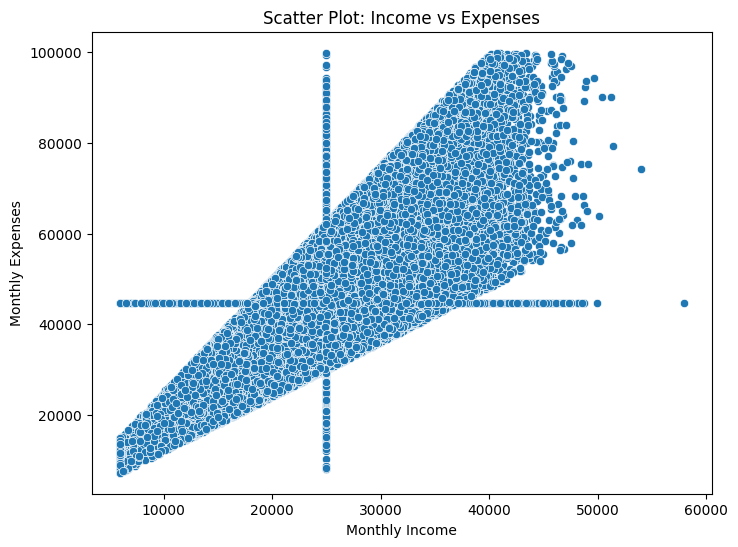

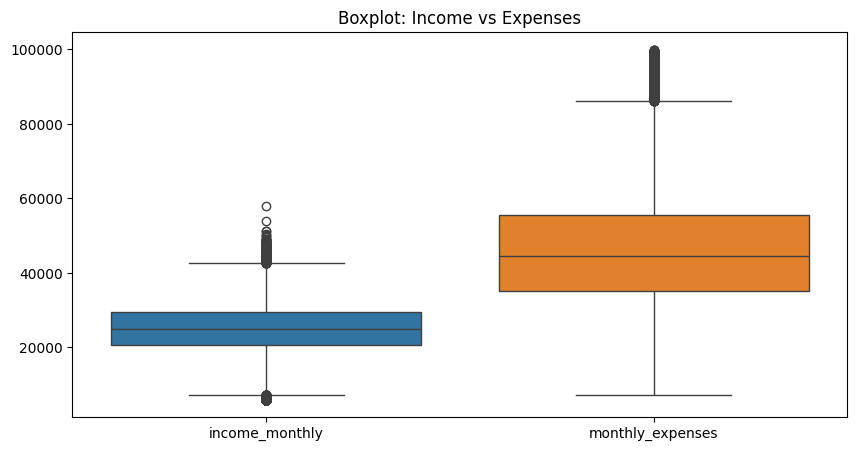

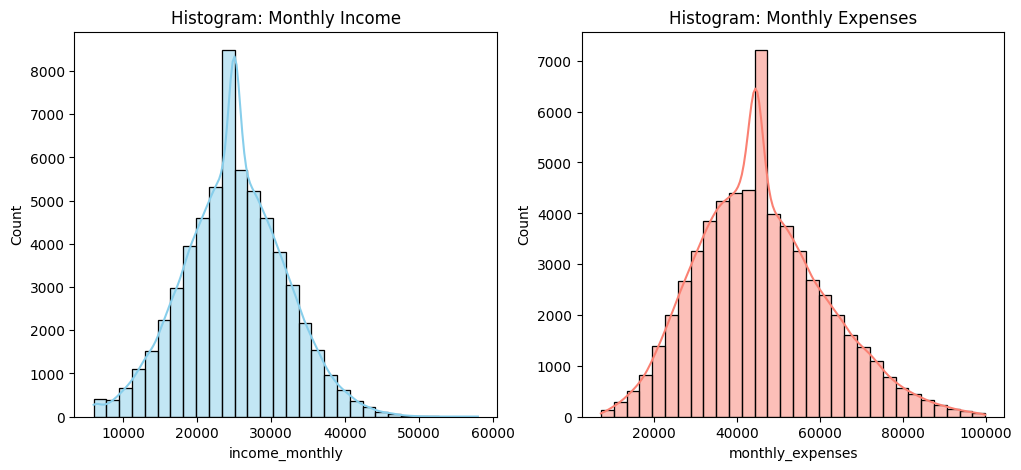

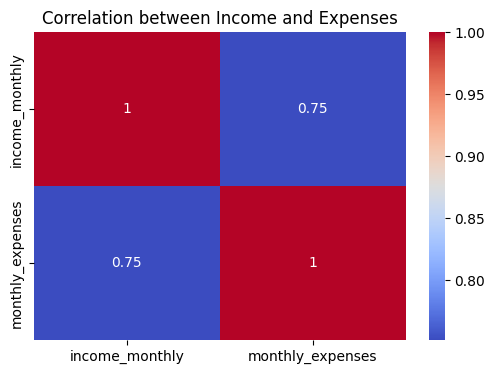

       income_monthly  monthly_expenses
count    60000.000000      60000.000000
mean     24979.969333      46008.218000
std       6820.430742      15555.986278
min       6000.000000       7260.000000
25%      20560.000000      35140.000000
50%      24990.000000      44650.000000
75%      29400.000000      55520.000000
max      57920.000000      99910.000000


In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ---------------------
# 1) Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='income_monthly', y='monthly_expenses', data=df)
plt.title("Scatter Plot: Income vs Expenses")
plt.xlabel("Monthly Income")
plt.ylabel("Monthly Expenses")
plt.show()

# ---------------------
# 2) Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['income_monthly', 'monthly_expenses']])
plt.title("Boxplot: Income vs Expenses")
plt.show()

# ---------------------
# 3) Histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['income_monthly'], kde=True, bins=30, color='skyblue')
plt.title("Histogram: Monthly Income")
plt.subplot(1,2,2)
sns.histplot(df['monthly_expenses'], kde=True, bins=30, color='salmon')
plt.title("Histogram: Monthly Expenses")
plt.show()

# ---------------------
# 4) Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['income_monthly', 'monthly_expenses']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Income and Expenses")
plt.show()

# ---------------------
# 5) Comparison statistics
comparison_stats = df[['income_monthly', 'monthly_expenses']].describe()
print(comparison_stats)


In [328]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,False,NaT,None,None,None
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,False,NaT,None,None,None
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None


In [329]:
import pandas as pd
import numpy as np
import re

# 1) تحويل القيم الرقمية (لو فيه نصوص فيها أرقام)
def clean_numeric(x):
    if pd.isna(x):
        return np.nan
    x_str = str(x)
    x_str = re.sub(r'[^\d.]', '', x_str)  # نشيل أي حاجة مش رقم أو نقطة
    if x_str == '':
        return np.nan
    return float(x_str)

df['debts'] = df['debts'].apply(clean_numeric)

# 2) التعامل مع القيم المفقودة
# ممكن تعملي:
# a) استبدالها بصفر لو مش مهم
# b) استبدالها بالمتوسط أو الوسيط Median
median_debt = df['debts'].median()
df['debts'].fillna(median_debt, inplace=True)

# 3) التأكد إن القيم موجبة ومنطقية
df['debts'] = df['debts'].apply(lambda x: x if x >= 0 else median_debt)

# 4) التعامل مع القيم المتطرفة (Outliers)
# مثلا أي قيمة أكبر من 99th percentile نستبدلها بالحد الأعلى المقبول
upper_limit = df['debts'].quantile(0.99)
df['debts'] = df['debts'].apply(lambda x: x if x <= upper_limit else upper_limit)


/tmp/ipython-input-3984809012.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['debts'].fillna(median_debt, inplace=True)


In [330]:
df['debt_to_income_ratio'] = df['debts'] / df['income_monthly']


In [331]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,NaN,1.92,NaN,NaN,False,NaT,None,None,None,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,NaN,NaN,NaN,male,False,NaT,None,None,None,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None,0.000000


In [332]:
df["housing_type"].value_counts()

,count
housing_type,
تمليك,11508
سكن حكومي,11487
سكن عشوائي,11413
إيجار,11330
سكن لدى الأقارب,11244


In [333]:
# 1️⃣ املأ القيم المفقودة قبل أي تحويل
most_common_housing = df['housing_type'].mode()[0]
df['housing_type'] = df['housing_type'].fillna(most_common_housing)

# 2️⃣ تحويل القيم لنصوص واضحة + إزالة المسافات
df['housing_type'] = df['housing_type'].astype(str).str.strip()

# 3️⃣ توحيد الأسماء لو فيه اختلافات في الكتابة
df['housing_type'] = df['housing_type'].replace({
    'سكن حكومى': 'سكن حكومي',
    'سكن عشوائى': 'سكن عشوائي',
    'مقيم في شبرا':'مقيم فى شبرا'
})

# 4️⃣ التأكد من القيم النهائية
print(df['housing_type'].value_counts())


housing_type
تمليك              14526
سكن حكومي          11487
سكن عشوائي         11413
إيجار              11330
سكن لدى الأقارب    11244
Name: count, dtype: int64


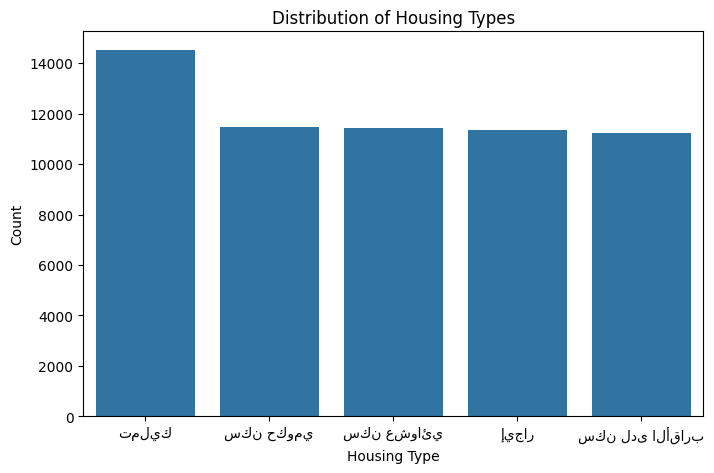

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='housing_type', data=df, order=df['housing_type'].value_counts().index)
plt.title("Distribution of Housing Types")
plt.xlabel("Housing Type")
plt.ylabel("Count")
plt.show()


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         60000 non-null  int64         
 8   debts                    60000 non-null  float64       
 9   housing_type             60000 non-null  object        
 10  health_status            57116 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [336]:
df["health_status"].value_counts()

,count
health_status,
مريض ضغط,9610
إعاقة ذهنية,9609
قلب,9522
مريض سكر,9514
إعاقة حركية,9477
سليم,9384


In [337]:
import pandas as pd


df['health_status'] = df['health_status'].replace("nan", pd.NA)

# 2) تنسيق النصوص
df['health_status'] = df['health_status'].astype(str).str.lower().str.strip()

# 3) توحيد المسميات
df['health_status'] = df['health_status'].replace({
    'سكر': 'مريض سكر',
    'مريض سكرى': 'مريض سكر',
    'ضغط': 'مريض ضغط',
    'قلب': 'قلب',
    'اعاقة حركية': 'إعاقة حركية',
    'اعاقة ذهنية': 'إعاقة ذهنية',
    'إعاقة حركية': 'إعاقة حركية',
    'إعاقة ذهنية': 'إعاقة ذهنية',
    'سليم': 'سليم',
    'unknown': 'غير معروف',
    '-': 'غير معروف',
    'nan': pd.NA
})

# 4) إكمال المفقود
most_common = df['health_status'].mode()[0]
df['health_status'] = df['health_status'].fillna(most_common)

print(df['health_status'].value_counts())


health_status
مريض ضغط       12494
إعاقة ذهنية     9609
قلب             9522
مريض سكر        9514
إعاقة حركية     9477
سليم            9384
Name: count, dtype: int64


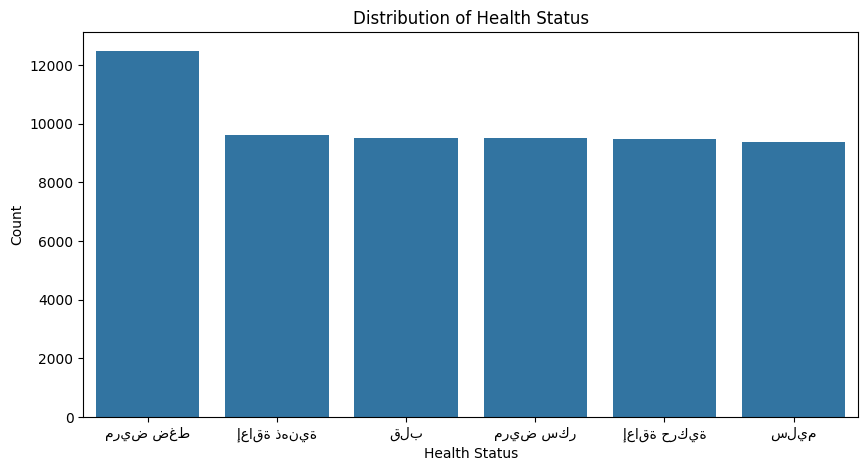

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='health_status', data=df, order=df['health_status'].value_counts().index)
plt.title("Distribution of Health Status")
plt.xlabel("Health Status")
plt.ylabel("Count")
plt.show()


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         60000 non-null  int64         
 8   debts                    60000 non-null  float64       
 9   housing_type             60000 non-null  object        
 10  health_status            60000 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [340]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,age,expense_to_income_ratio,recommended_org,gender,id_valid,birthdate,gov_code,governorate,gender_from_id,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,NaN,1.70,جمعية الأورمان,female,False,NaT,None,None,None,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,NaN,1.81,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,NaN,1.55,جمعية رسالة,female,False,NaT,None,None,None,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,NaN,1.92,NaN,NaN,False,NaT,None,None,None,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,NaN,2.00,جمعية الأورمان,female,False,NaT,None,None,None,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,NaN,1.54,جمعية التكافل الاجتماعي,male,False,NaT,None,None,None,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,NaN,NaN,NaN,male,False,NaT,None,None,None,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,NaN,2.03,مؤسسة مصر الخير,female,False,NaT,None,None,None,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,NaN,1.31,جمعية رسالة,female,False,NaT,None,None,None,0.000000


In [341]:
df.drop(columns=["id_valid"], inplace=True)


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         60000 non-null  int64         
 8   debts                    60000 non-null  float64       
 9   housing_type             60000 non-null  object        
 10  health_status            60000 non-null  object        
 11  request_text             56989 non-null  object        
 12  assistance_type          56988 n

In [343]:
df.isna().sum()

,0
name,0
national_id,0
case_type,0
family_size,0
phone,0
amount_received,0
income_monthly,0
monthly_expenses,0
debts,0
housing_type,0


In [344]:
df["request_text"].value_counts()

,count
request_text,
محمد شريف من مريض مزمن مقيم في إمبابة ويحتاج: تحتاج علاج وأدوية لمتابعة الحالة الصحية.,10
أحمد مراد من مريض مزمن مقيم في فيصل ويحتاج: تحتاج علاج وأدوية لمتابعة الحالة الصحية.,10
هند عبدالرحمن من مريض مزمن مقيم في المطرية ويحتاج: تحتاج علاج وأدوية لمتابعة الحالة الصحية.,9
مصطفى عبدالله من مريض مزمن مقيم في المطرية ويحتاج: تحتاج علاج وأدوية لمتابعة الحالة الصحية.,9
مصطفى النجار من مريض مزمن مقيم في المعادي ويحتاج: تحتاج علاج وأدوية لمتابعة الحالة الصحية.,9
...,...
مصطفى عبدالفتاح من أيتام مقيم في مدينة نصر ويحتاج: تحتاج سلة غذائية شهرية بسبب ضعف الدخل.,1
سلمى يوسف من أرملة مقيم في شبرا ويحتاج: تحتاج سلة غذائية شهرية بسبب ضعف الدخل.,1
إبراهيم يوسف من أرملة مقيم في المعادي ويحتاج: تحتاج سلة غذائية شهرية بسبب ضعف الدخل.,1


In [345]:
import pandas as pd
import re

def clean_request_text(text):

    # لو القيمة NaN
    if pd.isna(text):
        return "غير معروف"

    # نحول أي نوع لنص
    text = str(text).strip()

    if text == "":
        return "غير معروف"

    # إزالة الرموز الزيادة ويكون نص نظيف فقط
    text_clean = re.sub(r'[^0-9\u0600-\u06FF\s:]', ' ', text)
    text_clean = re.sub(r'\s+', ' ', text_clean).strip()

    return text_clean

# تطبيق الدالة على العمود
df["request_text"] = df["request_text"].apply(clean_request_text)

df.head()


,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,birthdate,gov_code,governorate,gender_from_id,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,NaT,None,None,None,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,NaT,None,None,None,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,NaT,None,None,None,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,NaT,None,None,None,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,NaT,None,None,None,0.354176


In [346]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,number_of_children,age,expense_to_income_ratio,recommended_org,gender,birthdate,gov_code,governorate,gender_from_id,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,1.0,NaN,1.70,جمعية الأورمان,female,NaT,None,None,None,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,0.0,NaN,1.81,جمعية التكافل الاجتماعي,male,NaT,None,None,None,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,3.0,NaN,1.55,جمعية رسالة,female,NaT,None,None,None,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,1.0,NaN,1.92,NaN,NaN,NaT,None,None,None,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,3.0,NaN,2.00,جمعية الأورمان,female,NaT,None,None,None,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,3.0,NaN,1.54,جمعية التكافل الاجتماعي,male,NaT,None,None,None,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,4.0,NaN,NaN,NaN,male,NaT,None,None,None,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,NaN,NaN,2.03,مؤسسة مصر الخير,female,NaT,None,None,None,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,2.0,NaN,1.31,جمعية رسالة,female,NaT,None,None,None,0.000000


In [347]:
df.drop(columns=["age"], inplace=True)


In [348]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,neighborhood,number_of_children,expense_to_income_ratio,recommended_org,gender,birthdate,gov_code,governorate,gender_from_id,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,إمبابة,1.0,1.70,جمعية الأورمان,female,NaT,None,None,None,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,الهرم,0.0,1.81,جمعية التكافل الاجتماعي,male,NaT,None,None,None,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,العطارين,3.0,1.55,جمعية رسالة,female,NaT,None,None,None,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,الهرم,1.0,1.92,NaN,NaN,NaT,None,None,None,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,السيدة زينب,3.0,2.00,جمعية الأورمان,female,NaT,None,None,None,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,السيدة زينب,3.0,1.54,جمعية التكافل الاجتماعي,male,NaT,None,None,None,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,سان ستيفانو,4.0,NaN,NaN,male,NaT,None,None,None,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,مدينة نصر,NaN,2.03,مؤسسة مصر الخير,female,NaT,None,None,None,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,شبرا,2.0,1.31,جمعية رسالة,female,NaT,None,None,None,0.000000


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     60000 non-null  object        
 1   national_id              60000 non-null  object        
 2   case_type                60000 non-null  object        
 3   family_size              60000 non-null  int64         
 4   phone                    60000 non-null  object        
 5   amount_received          60000 non-null  float64       
 6   income_monthly           60000 non-null  int64         
 7   monthly_expenses         60000 non-null  int64         
 8   debts                    60000 non-null  float64       
 9   housing_type             60000 non-null  object        
 10  health_status            60000 non-null  object        
 11  request_text             60000 non-null  object        
 12  assistance_type          56988 n

In [350]:
df.drop(columns=[
    "birthdate",
    "gov_code",
    "governorate",
    "gender_from_id"

], inplace=True)


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          56988 non-null  object 
 13  need_level               57005 non-null  object 
 14  city                  

In [352]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,expense_to_income_ratio,recommended_org,gender,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1.0,1.70,جمعية الأورمان,female,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0.0,1.81,جمعية التكافل الاجتماعي,male,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3.0,1.55,جمعية رسالة,female,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1.0,1.92,NaN,NaN,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3.0,2.00,جمعية الأورمان,female,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,علي عبدالرحمن من أيتام مقيم في مدينة نصر ويحتا...,financial,Medium,أسوان,السيدة زينب,3.0,1.54,جمعية التكافل الاجتماعي,male,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,خالد عبدالباقي من أيتام مقيم في فيصل ويحتاج: ت...,food,Medium,بني سويف,سان ستيفانو,4.0,NaN,NaN,male,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,صفاء شريف من ذوي إعاقة مقيم في إمبابة ويحتاج: ...,disability_equipment,Medium,قنا,مدينة نصر,NaN,2.03,مؤسسة مصر الخير,female,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,إبراهيم عبدالفتاح من أرملة مقيم في السيدة زينب...,food,Low,أسوان,شبرا,2.0,1.31,جمعية رسالة,female,0.000000


In [353]:
df["assistance_type"].value_counts()

,count
assistance_type,
medical,15296
food,11441
financial,11332
education,7669
housing,7494
disability_equipment,3756


In [354]:
# تحويل النص لصيغة موحدة
df["assistance_type"] = (
    df["assistance_type"]
    .astype(str)
    .str.strip()
    .str.lower()
)
# قاموس تصحيح القيم
mapping = {
    "med": "medical",
    "medic": "medical",
    "medical": "medical",
    "food": "food",
    "fd": "food",
    "financial": "financial",
    "finance": "financial",
    "money": "financial",
    "edu": "education",
    "education": "education",
    "school": "education",
    "housing": "housing",
    "home": "housing",
    "house": "housing",
    "disability": "disability_equipment",
    "disability_equipment": "disability_equipment",
    "equipment": "disability_equipment",
    "nan": "unknown",
    "none": "unknown",
    "": "unknown"
}

# تطبيق التصحيح
df["assistance_type"] = df["assistance_type"].replace(mapping)


In [355]:
valid = [
    "medical",
    "food",
    "financial",
    "education",
    "housing",
    "disability_equipment",
    "unknown"
]

df["assistance_type"] = df["assistance_type"].apply(
    lambda x: x if x in valid else "unknown"
)


In [356]:
# df = pd.get_dummies(df, columns=["assistance_type"], prefix="assist")


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          60000 non-null  object 
 13  need_level               57005 non-null  object 
 14  city                  

In [358]:
df["need_level"].value_counts()

,count
need_level,
Medium,30348
High,15607
Low,11050


In [359]:
df["need_level"] = (
    df["need_level"]
    .astype(str)
    .str.strip()
    .str.lower()
)
# قاموس تصحيح الأخطاء
need_map = {
    "high": "high",
    "hig": "high",
    "h": "high",

    "medium": "medium",
    "med": "medium",
    "mid": "medium",
    "m": "medium",

    "low": "low",
    "loww": "low",
    "l": "low",

    "nan": "unknown",
    "none": "unknown",
    "": "unknown"
}

df["need_level"] = df["need_level"].replace(need_map)



In [360]:
valid_levels = ["high", "medium", "low", "unknown"]

df["need_level"] = df["need_level"].apply(
    lambda x: x if x in valid_levels else "unknown"
)


In [361]:
df["need_level"] = df["need_level"].str.capitalize()
# df = pd.get_dummies(df, columns=["need_level"], prefix="need")


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          60000 non-null  object 
 13  need_level               60000 non-null  object 
 14  city                  

In [363]:
df

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,expense_to_income_ratio,recommended_org,gender,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.0,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1.0,1.70,جمعية الأورمان,female,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.0,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0.0,1.81,جمعية التكافل الاجتماعي,male,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.0,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3.0,1.55,جمعية رسالة,female,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.0,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1.0,1.92,NaN,NaN,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.0,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3.0,2.00,جمعية الأورمان,female,0.354176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,علي عبدالرحمن,invalid_id,ايتام,3,1129841384,500.0,30210,46680,960.0,سكن عشوائي,...,علي عبدالرحمن من أيتام مقيم في مدينة نصر ويحتا...,financial,Medium,أسوان,السيدة زينب,3.0,1.54,جمعية التكافل الاجتماعي,male,0.031778
59996,خالد عبدالباقي,95920115758852,ايتام,7,1226110905,500.0,14570,31160,0.0,إيجار,...,خالد عبدالباقي من أيتام مقيم في فيصل ويحتاج: ت...,food,Medium,بني سويف,سان ستيفانو,4.0,NaN,NaN,male,0.000000
59997,صفاء شريف,28948804346961,ذوي اعاقه,3,1066819332,2000.0,35180,71410,0.0,سكن عشوائي,...,صفاء شريف من ذوي إعاقة مقيم في إمبابة ويحتاج: ...,disability_equipment,Medium,قنا,مدينة نصر,NaN,2.03,مؤسسة مصر الخير,female,0.000000
59998,ابراهيم عبدالفتاح,92279688670624,غير معروف,7,1122038189,800.0,15010,19620,0.0,إيجار,...,إبراهيم عبدالفتاح من أرملة مقيم في السيدة زينب...,food,Low,أسوان,شبرا,2.0,1.31,جمعية رسالة,female,0.000000


In [364]:
# df.drop(columns=["assist_education","assist_financial","assist_food","assist_housing","assist_medical","assist_unknown","need_High","need_Low","need_Medium","need_Unknown"], inplace=True)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          60000 non-null  object 
 13  need_level               60000 non-null  object 
 14  city                  

In [366]:

df["city"].value_counts()

,count
city,
المنصورة,4160
الإسكندرية,4156
القاهرة,4119
بني سويف,4115
دمياط,4108
بورسعيد,4097
طنطا,4095
أسيوط,4089
المنيا,4087


In [367]:
import pandas as pd

# 1) إصلاح الـ NaN المزيفة اللي اتقلبت لنص "nan"
df["city"] = df["city"].replace("nan", pd.NA)

# 2) تنسيق النصوص
df["city"] = (
    df["city"]
    .astype(str)
    .str.strip()
)

# 3) تحويل أي قيم غير معروفة → NaN
df["city"] = df["city"].replace({
    "nan": pd.NA,
    "None": pd.NA,
    "": pd.NA,
    "-": pd.NA,
})

# 4) توحيد أسماء المدن
city_map = {
    "المنصورة": "المنصورة",
    "الإسكندرية": "الإسكندرية",
    "القاهرة": "القاهرة",
    "بني سويف": "بني سويف",
    "دمياط": "دمياط",
    "بورسعيد": "بورسعيد",
    "طنطا": "طنطا",
    "أسيوط": "أسيوط",
    "المنيا": "المنيا",
    "الجيزة": "الجيزة",
    "أسوان": "أسوان",
    "سوهاج": "سوهاج",
    "الزقازيق": "الزقازيق",
    "قنا": "قنا",
}

df["city"] = df["city"].replace(city_map)

# 5) ملء القيم الناقصة بأشهر مدينة في الداتا
most_common_city = df["city"].mode()[0]
df["city"] = df["city"].fillna(most_common_city)

df["city"].value_counts()


,count
city,
المنصورة,7091
الإسكندرية,4156
القاهرة,4119
بني سويف,4115
دمياط,4108
بورسعيد,4097
طنطا,4095
أسيوط,4089
المنيا,4087


In [368]:
# التعامل مع القيم المفقودة
df["number_of_children"] = df["number_of_children"].fillna(0)  # لو عايزة صفر بدل NaN
df["number_of_children"] = df["number_of_children"].astype(int)


In [369]:
# تنظيف العمود وتحويل القيم المفقودة ل0
df["expense_to_income_ratio"] = df["expense_to_income_ratio"].fillna(0)


In [370]:
df["recommended_org"].value_counts()

,count
recommended_org,
مؤسسة مصر الخير,11443
جمعية الأورمان,11439
جمعية التكافل الاجتماعي,11391
جمعية رسالة,11384
جمعية الباقيات الصالحات,11315


In [371]:
# تحويل العمود لأي قيمة نص
df["recommended_org"] = df["recommended_org"].astype(str).str.strip()

# توحيد الحروف (اختياري)
df["recommended_org"] = df["recommended_org"].str.title()

# تحويل القيم الفارغة أو الغريبة لـ "غير معروف"
df["recommended_org"] = df["recommended_org"].replace({
    "Nan": "غير معروف",
    "None": "غير معروف",
    "Non": "غير معروف",
    "": "غير معروف"
})

# Optional: توحيد أي أخطاء شائعة في كتابة أسماء الجمعيات
org_map = {
    "مؤسسة مصر الخير": "مؤسسة مصر الخير",
    "جمعية الأورمان": "جمعية الأورمان",
    "جمعية التكافل الاجتماعي": "جمعية التكافل الاجتماعي",
    "جمعية رسالة": "جمعية رسالة",
    "جمعية الباقيات الصالحات": "جمعية الباقيات الصالحات"
}

df["recommended_org"] = df["recommended_org"].replace(org_map)


In [372]:
df["gender"].value_counts()

,count
gender,
female,34193
male,22792


In [373]:
# تحويل النصوص لصيغة موحدة
df["gender"] = (
    df["gender"]
    .astype(str)          # تحويل أي قيمة لنص
    .str.strip()          # إزالة المسافات من البداية والنهاية
    .str.lower()          # تحويل كل الحروف لصغيرة
)

# تصحيح الأخطاء الإملائية الشائعة
gender_map = {
    "female": "Female",
    "femal": "Female",
    "f": "Female",
    "male": "Male",
    "ml": "Male",
    "m": "Male",
    "nan": "غير معروف",
    "none": "غير معروف",
    "": "غير معروف"
}

df["gender"] = df["gender"].replace(gender_map)


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          60000 non-null  object 
 13  need_level               60000 non-null  object 
 14  city                  

In [375]:
df["neighborhood"].value_counts()

,count
neighborhood,
عين شمس,4473
فيصل,4421
حلوان,4420
العطارين,4418
سان ستيفانو,4410
الهرم,4401
المطرية,4401
إمبابة,4400
مدينة نصر,4368


In [376]:
import pandas as pd

# 1) إعادة NaN الحقيقي لو اتقلب "nan" نص
df["neighborhood"] = df["neighborhood"].replace("nan", pd.NA)

# 2) تنسيق النصوص
df["neighborhood"] = (
    df["neighborhood"]
    .astype(str)
    .str.strip()
)

# 3) التعامل مع القيم غير المعروفة
df["neighborhood"] = df["neighborhood"].replace({
    "nan": pd.NA,
    "None": pd.NA,
    "": pd.NA,
    "-": pd.NA,
})

# 4) توحيد الأسماء
neighborhood_map = {
    "امبابة": "إمبابة",
    "إمبابة": "إمبابة",
    "الهرم": "الهرم",
    "العطارين": "العطارين",
    "السيدة زينب": "السيدة زينب",
    "فيصل": "فيصل",
    "عين شمس": "عين شمس",
    "المعادي": "المعادي",
    "مدينة نصر": "مدينة نصر",
    "المحلة الكبرى": "المحلة الكبرى",
    "سان ستيفانو": "سان ستيفانو",
}

df["neighborhood"] = df["neighborhood"].replace(neighborhood_map)

# 5) إكمال القيم المفقودة بأكثر حي شائع
most_common = df["neighborhood"].mode()[0]
df["neighborhood"] = df["neighborhood"].fillna(most_common)

df["neighborhood"].value_counts()


,count
neighborhood,
عين شمس,7435
فيصل,4421
حلوان,4420
العطارين,4418
سان ستيفانو,4410
الهرم,4401
المطرية,4401
إمبابة,4400
مدينة نصر,4368


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     60000 non-null  object 
 1   national_id              60000 non-null  object 
 2   case_type                60000 non-null  object 
 3   family_size              60000 non-null  int64  
 4   phone                    60000 non-null  object 
 5   amount_received          60000 non-null  float64
 6   income_monthly           60000 non-null  int64  
 7   monthly_expenses         60000 non-null  int64  
 8   debts                    60000 non-null  float64
 9   housing_type             60000 non-null  object 
 10  health_status            60000 non-null  object 
 11  request_text             60000 non-null  object 
 12  assistance_type          60000 non-null  object 
 13  need_level               60000 non-null  object 
 14  city                  

In [378]:
df.isna().sum()

,0
name,0
national_id,0
case_type,0
family_size,0
phone,0
amount_received,0
income_monthly,0
monthly_expenses,0
debts,0
housing_type,0


In [379]:
df.head(20)

,name,national_id,case_type,family_size,phone,amount_received,income_monthly,monthly_expenses,debts,housing_type,...,request_text,assistance_type,need_level,city,neighborhood,number_of_children,expense_to_income_ratio,recommended_org,gender,debt_to_income_ratio
0,نجلاء عبدالباسط,50370498039207,ذوي اعاقه,3,1183629898,200.0,17980,30500,0.00,سكن لدى الأقارب,...,نجلاء عبدالباسط من ذوي إعاقة مقيم في المطرية و...,disability_equipment,Low,الزقازيق,إمبابة,1,1.70,جمعية الأورمان,Female,0.000000
1,حسن كمال,65150394917789,ايتام,4,1014613636,1000.0,34970,63280,8961.00,تمليك,...,حسن كمال من أيتام مقيم في إمبابة ويحتاج: تحتاج...,food,High,سوهاج,الهرم,0,1.81,جمعية التكافل الاجتماعي,Male,0.256248
2,فاطمة عبدالرحمن,32515235878793,ارمله,8,1013124808,1500.0,24820,44650,0.00,سكن لدى الأقارب,...,فاطمة عبدالرحمن من أرملة مقيم في سان ستيفانو و...,education,Low,الجيزة,العطارين,3,1.55,جمعية رسالة,Female,0.000000
3,ابراهيم الهواري,46071550347522,ايتام,6,1200902016,600.0,28730,55160,0.00,تمليك,...,إبراهيم الهواري من أيتام مقيم في العطارين ويحت...,financial,Medium,الإسكندرية,الهرم,1,1.92,غير معروف,غير معروف,0.000000
4,غير معروف,63352487361031,اسره فقيره,7,1529047284,1500.0,31010,62080,10983.00,تمليك,...,آمال النجار من أسرة فقيرة مقيم في المحلة الكبر...,food,High,الزقازيق,السيدة زينب,3,2.00,جمعية الأورمان,Female,0.354176
5,امال انور,89658472227676,ارمله,2,1010017824,800.0,25300,52430,14473.00,سكن حكومي,...,آمال أنور من أرملة مقيم في مدينة نصر ويحتاج: ت...,food,High,الجيزة,إمبابة,1,2.07,غير معروف,Female,0.572055
6,نجلاء عبدالله,51253738857239,اسره فقيره,2,1553270901,600.0,20070,46430,0.00,إيجار,...,نجلاء عبدالله من أسرة فقيرة مقيم في المحلة الك...,financial,Medium,الجيزة,فيصل,2,2.31,جمعية الأورمان,Female,0.000000
7,مراد النجار,95445940865922,ذوي اعاقه,8,1147055689,0.0,24990,44520,3034.00,تمليك,...,مراد النجار من ذوي إعاقة مقيم في العطارين ويحت...,medical,Medium,بني سويف,عين شمس,0,1.82,جمعية الأورمان,Male,0.121409
8,محمود انور,85678021986931,ايتام,3,1100123185,1000.0,29810,68480,35.00,سكن عشوائي,...,محمود أنور من أيتام مقيم في حلوان ويحتاج: تحتا...,food,High,الزقازيق,عين شمس,2,2.30,جمعية الباقيات الصالحات,Male,0.001174
9,صفاء النجار,23198139775396,ذوي اعاقه,8,1546434338,300.0,31840,49380,0.00,تمليك,...,صفاء النجار من ذوي إعاقة مقيم في شبرا ويحتاج: ...,disability_equipment,Unknown,طنطا,المعادي,2,1.55,جمعية التكافل الاجتماعي,Female,0.000000


In [380]:
# حفظ الداتا المنضفة في ملف Excel
df.to_excel("Awnn_cleaned_data.xlsx", index=False)
